# Краудфандиг на Kickstarter

## Обработка данных

In [3]:
# Импортируем библиотеки

import pandas as pd
import numpy as np

In [4]:
# Загружаем данные в dataframe

data = pd.read_csv('data/ks.csv')

In [5]:
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00


In [6]:
data.shape

(378661, 11)

## EDA

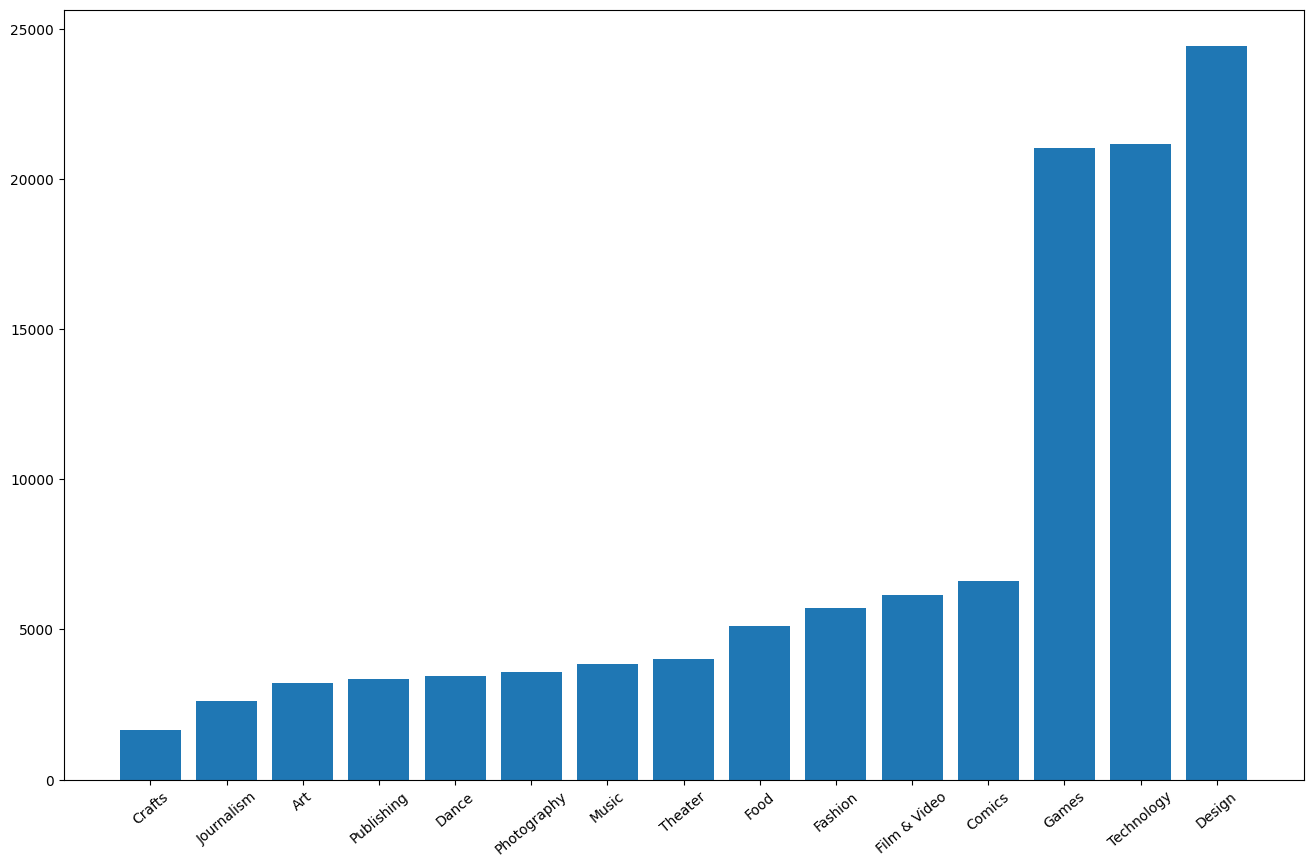

In [10]:
from matplotlib import pyplot as plt

main_category = data.groupby("Главная категория")["Собрано в долларах"].mean()
main_category = main_category.sort_values()
fig = plt.figure()

fig.set_size_inches(16, 10)

plt.bar(main_category.index, main_category.values)
plt.xticks(rotation = 40)

plt.show()

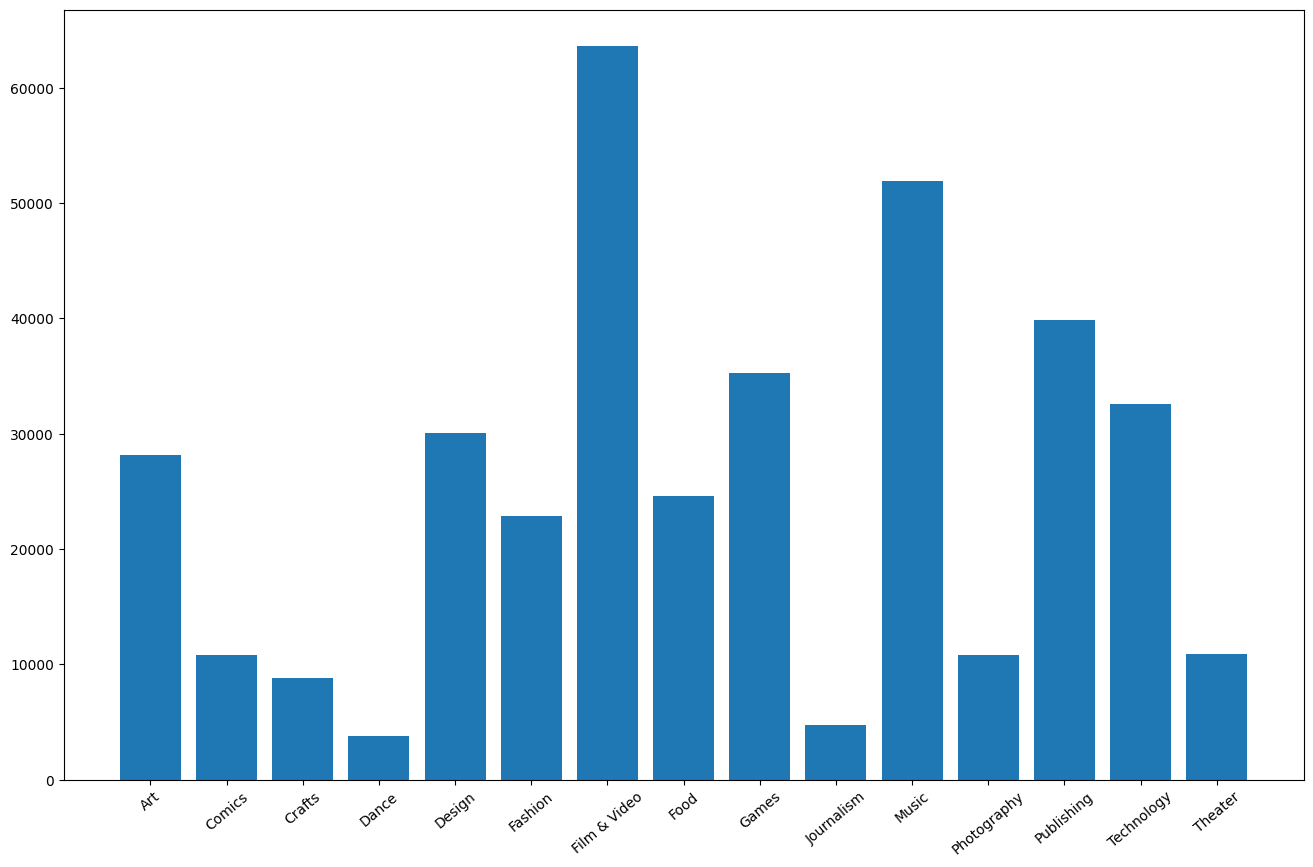

In [12]:
from matplotlib import pyplot as plt

main_category_count = data.groupby("Главная категория")["Собрано в долларах"].count()

fig = plt.figure()

fig.set_size_inches(16, 10)

plt.bar(main_category_count.index, main_category_count.values)
plt.xticks(rotation = 40)

plt.show()

C:\Users\fedor\AppData\Local\Temp\ipykernel_6580\795199992.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(currency_dict.values(),


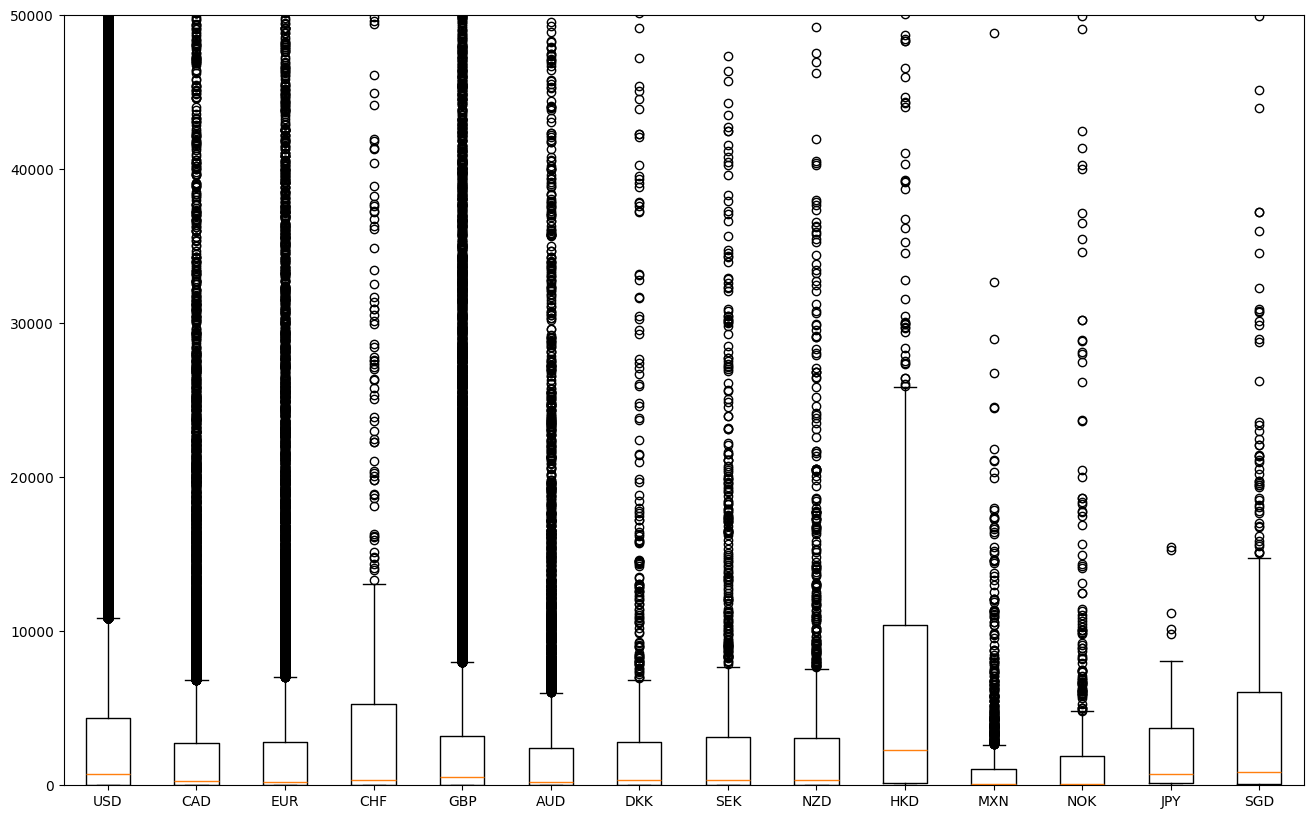

In [17]:
currency_dict = {}

for currency in data["Валюта"].unique():

    currency_dict[currency] = data[data["Валюта"]==currency]["Собрано в долларах"]

fig = plt.figure()

fig.set_size_inches(16, 10)

plt.boxplot(currency_dict.values(),
            labels=currency_dict.keys())
plt.ylim((0, 50000))
plt.show()

In [5]:
### Проверим распределение проектов по признаку "Состояние"

data['Состояние'].value_counts()

Состояние
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

In [6]:
### Оставим только проекты с состоянием failed и successful

data = data[data['Состояние'].isin(['failed','successful'])]

### 2 варианта таргета:

- Классификация. Те проекты, у которых успешный статус, единичкой, а остальные ноликами

- Регрессия. Можем предсказывать просто собранное количество денег, применять модель, а потом уже смотреть, нужная ли сумма получилось.

In [7]:
data['Состояние'].value_counts()

Состояние
failed        197719
successful    133956
Name: count, dtype: int64

In [8]:
### Создадим колонку target1 (бинарный таргет: 0 - неуспешный проект, 1 - успешный проект)

# data.loc[(data['Состояние'] == 'failed'), 'таргет1'] = 0
# data['таргет1'] = data['таргет1'].fillna(1)

data['таргет1'] = data['Состояние'].apply(lambda x: 0 if x=='failed' else 1) 

In [9]:
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах,таргет1
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.0,1
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.0,0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.0,1
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,successful,86,US,10030.88,10000.0,1
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,failed,0,US,0.00,10000.0,0


In [10]:
### Удалим столбец состояние

data = data.drop('Состояние', axis = 1)

In [11]:
### Создадим вещественный таргет2 (сколько денег соберет проект)

data = data.rename({'Собрано в долларах': 'таргет2'}, axis = 1)
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Инвесторов,Страна,таргет2,Цель в долларах,таргет1
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0


### Обработаем сырые данные. Извлечем признаки, где они не даны явно.

In [12]:
### Оставим от колонок с датами разницу в днях

data['Дедлайн'] = pd.to_datetime(data['Дедлайн'])
data['Дата публикации'] = pd.to_datetime(data['Дата публикации'])

In [13]:
data['Срок'] = (data['Дедлайн'] - data['Дата публикации']).dt.days

In [14]:
### Добавим Год публикации

data['Год публикации'] = data['Дата публикации'].dt.year

In [15]:
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Инвесторов,Страна,таргет2,Цель в долларах,таргет1,Срок,Год публикации
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1,31,2012
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0,29,2016
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1,29,2015
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1,44,2013
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0,29,2012


### Добавим дополнительные данные для объяснения таргет переменной

In [16]:
### Добавим макропоказатели

Macro = pd.read_excel("data/macrofeatures.xlsx", engine = "openpyxl")

In [17]:
Macro.head()

,Unnamed: 0,Close_brent,Close_sugar,Close_cereals,Close_index_moex,Close_index_moex_10,Close_index_RGBI,Close_index_RTS_oil_and_gas,Close_index_RTS_metallurgy,Close_index_RTS_consumer_sector,Close_index_RTS_telecom,Close_index_RTS_finance,Close_index_RTS_transport,Close_index_RTS_chemicals,Close_index_RTS_broad_market,Close_index_RTS_electricity,dlk_cob_date
0,0,34.41,13.97,442.75,1797.27,3940.81,125.59,123.40,111.97,196.55,70.17,140.57,27.06,177.38,530.59,32.49,2016-02-24
1,1,35.06,14.24,445.25,1803.89,3977.35,126.44,124.22,112.51,198.03,70.56,142.64,27.43,179.48,536.20,33.07,2016-02-25
2,2,35.13,14.00,443.25,1816.73,4027.23,126.90,125.38,113.44,200.13,71.94,145.45,28.06,181.56,544.73,33.55,2016-02-26
3,3,36.64,14.36,445.00,1840.17,4084.24,126.87,126.69,114.66,200.32,72.41,147.22,28.49,186.76,552.82,34.41,2016-02-29
4,4,36.60,14.39,438.50,1844.17,4087.06,127.78,129.72,117.09,204.30,74.26,150.04,30.12,190.67,565.45,34.96,2016-03-01


In [18]:
### Смёрджим колонки, оставив одну макрофичу (цену закрытия нефти)

Macro = Macro[['Close_brent', 'dlk_cob_date']].drop_duplicates()

In [19]:
Macro.groupby('dlk_cob_date')['Close_brent'].count()

dlk_cob_date
2016-02-24    1
2016-02-25    1
2016-02-26    1
2016-02-29    1
2016-03-01    1
             ..
2021-11-22    1
2021-11-23    1
2021-11-24    1
2021-11-26    1
2021-11-29    1
Name: Close_brent, Length: 1288, dtype: int64

In [20]:
Macro['dlk_cob_date'] = pd.to_datetime(Macro['dlk_cob_date'])

In [21]:
data['Дата публикации'] = data['Дата публикации'].astype("datetime64[ns]")

In [22]:
data = pd.merge(data,
         Macro,
         left_on = "Дата публикации",
         right_on = "dlk_cob_date",
         how = "left")

In [23]:
data = data.sort_values('Дата публикации')

In [24]:
### Заполним пропущенные значения в цене нефти

data['Close_brent'] = data['Close_brent'].fillna(34.41)

### Избавляемся от колонок, не являющихся признаками

In [25]:
### Уберем колонки Дедлайн, Дата публикации, dlk_cob_date

data = data.drop(['Дедлайн', 'Дата публикации', 'dlk_cob_date'], axis = 1)
data.head()

,Название,Категория,Главная категория,Валюта,Инвесторов,Страна,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent
176128,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0,39,2009,34.41
241929,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.0,80000.0,0,87,2009,34.41
244460,drawing for dollars,Illustration,Art,USD,3,US,35.0,20.0,1,8,2009,34.41
80845,Offline Wikipedia iPhone app,Software,Technology,USD,25,US,145.0,99.0,1,79,2009,34.41
181197,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0,28,2009,34.41


In [26]:
### Уберем признаки: Название (так как оно как id), Страна (Данные уже представлены в колонке Валюта), Инвесторов (так как мы можем посчитать только постфактум)

data = data.drop(['Название', 'Страна', 'Инвесторов'], axis = 1)
data.head()

,Категория,Главная категория,Валюта,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent
176128,Fashion,Fashion,USD,625.0,1000.0,0,39,2009,34.41
241929,Shorts,Film & Video,USD,22.0,80000.0,0,87,2009,34.41
244460,Illustration,Art,USD,35.0,20.0,1,8,2009,34.41
80845,Software,Technology,USD,145.0,99.0,1,79,2009,34.41
181197,Fashion,Fashion,USD,387.0,1900.0,0,28,2009,34.41


### One-hot encoding

In [27]:
### One-hot encoding колонки с валютой

data = pd.concat((data, pd.get_dummies(data['Валюта']).astype(int)), axis=1)
data = data.drop(['Валюта'], axis = 1)

In [28]:
data.head()

,Категория,Главная категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,AUD,CAD,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
176128,Fashion,Fashion,625.0,1000.0,0,39,2009,34.41,0,0,...,0,0,0,0,0,0,0,0,0,1
241929,Shorts,Film & Video,22.0,80000.0,0,87,2009,34.41,0,0,...,0,0,0,0,0,0,0,0,0,1
244460,Illustration,Art,35.0,20.0,1,8,2009,34.41,0,0,...,0,0,0,0,0,0,0,0,0,1
80845,Software,Technology,145.0,99.0,1,79,2009,34.41,0,0,...,0,0,0,0,0,0,0,0,0,1
181197,Fashion,Fashion,387.0,1900.0,0,28,2009,34.41,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
### Избавимся от избыточной информации

data = data.drop(['AUD'], axis = 1)

In [30]:
### One-hot encoding колонки с главной категорией

data = pd.concat((data, pd.get_dummies(data['Главная категория']).astype(int)), axis=1)
data = data.drop(['Главная категория'], axis = 1)
data.head()

,Категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,CAD,CHF,DKK,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
176128,Fashion,625.0,1000.0,0,39,2009,34.41,0,0,0,...,1,0,0,0,0,0,0,0,0,0
241929,Shorts,22.0,80000.0,0,87,2009,34.41,0,0,0,...,0,1,0,0,0,0,0,0,0,0
244460,Illustration,35.0,20.0,1,8,2009,34.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80845,Software,145.0,99.0,1,79,2009,34.41,0,0,0,...,0,0,0,0,0,0,0,0,1,0
181197,Fashion,387.0,1900.0,0,28,2009,34.41,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
data = data.drop(['Games'], axis = 1)

In [32]:
### Посмотрим на количество вариантов в столбце Категория
data['Категория'].unique()

array(['Fashion', 'Shorts', 'Illustration', 'Software', 'Journalism',
       'Fiction', 'Rock', 'Photography', 'Puzzles', 'Graphic Design',
       'Film & Video', 'Publishing', 'Documentary', 'Theater',
       'Sculpture', 'Electronic Music', 'Nonfiction', 'Painting',
       'Indie Rock', 'Public Art', 'Art', 'Crafts', 'Jazz', 'Music',
       'Comics', "Children's Books", 'Narrative Film', 'Tabletop Games',
       'Video Games', 'Digital Art', 'Food', 'Animation',
       'Conceptual Art', 'Pop', 'Hip-Hop', 'Country & Folk',
       'Periodicals', 'Webseries', 'Product Design', 'Performance Art',
       'Art Books', 'World Music', 'Knitting', 'Technology',
       'Classical Music', 'Graphic Novels', 'Poetry', 'Radio & Podcasts',
       'Design', 'Hardware', 'Webcomics', 'Dance', 'Translations',
       'Crochet', 'Games', 'Photo', 'Mixed Media', 'Space Exploration',
       'Photobooks', 'Musical', 'Audio', 'Community Gardens', 'R&B',
       'Fabrication Tools', 'Textiles', 'Architecture',

### Mean-target encoding (Счётчики)

In [33]:
### Проведем mean-target encoding колонки Категория

data['Категория'] = data['Категория'].map(data.groupby(['Категория'])['таргет2'].mean())

In [34]:
data.head()

,Категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,CAD,CHF,DKK,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,625.0,1000.0,0,39,2009,34.41,0,0,0,...,0,1,0,0,0,0,0,0,0,0
241929,3591.033473,22.0,80000.0,0,87,2009,34.41,0,0,0,...,0,0,1,0,0,0,0,0,0,0
244460,3661.424550,35.0,20.0,1,8,2009,34.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80845,4321.245721,145.0,99.0,1,79,2009,34.41,0,0,0,...,0,0,0,0,0,0,0,0,1,0
181197,6035.989239,387.0,1900.0,0,28,2009,34.41,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Определимся с таргетом

In [35]:
### Так как будем решать задачу регрессии, уберем target1

data = data.drop("таргет1", axis=1)

In [36]:
### Разделим данные на объекты и ответы

X = data.drop('таргет2', axis=1)
Y = data['таргет2']

In [37]:
X.to_csv("data/samples.csv", sep=",", index = False)
X

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,1000.00,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
241929,3591.033473,80000.00,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
244460,3661.424550,20.00,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80845,4321.245721,99.00,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
181197,6035.989239,1900.00,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,7635.064778,35.98,2,2017,34.41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
318187,38415.722876,271.03,4,2017,34.41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
264474,6098.303122,200.00,3,2017,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
293634,38415.722876,250.00,1,2017,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Y.to_csv("data/targets_linreg.csv", sep=",", index=False)
Y

176128    625.00
241929     22.00
244460     35.00
80845     145.00
181197    387.00
           ...  
247730    269.84
318187    544.77
264474    202.00
293634    265.00
23315     513.60
Name: таргет2, Length: 331675, dtype: float64